####**3. Выбор и обучение моделей**

In [200]:
import numpy as np
import pandas as pd

In [ ]:
# Загрузка DataFrame из сохраненного CSV-файла
#df = pd.read_csv('composit_boxcox.csv')
#df.head()

In [ ]:
#numerical = ['Matrix-Filler Ratio', 'Density', 'Elastic Modulus',\
             #'Curing Agent Quantity', 'Epoxy Groups Content','Flash Point Temperature',\
            # 'Surface Density_boxcox', 'Resin Consumption', 'Layup Step', 'Layup Density']

In [ ]:
# Выбираем только числовые признаки
#numerical_df = df[numerical]

In [85]:
# Количественно выбросы можно найти через стандартизированную оценку (z-оценку, z-score).
# Эта оценка показывает на сколько средних квадратических отклонений значение отличается от среднего
#from scipy import stats
#z = stats.zscore(df[numerical])
#z=pd.DataFrame(z,columns=df[numerical].columns)
#z.head()

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Surface Density_boxcox,Resin Consumption,Layup Step,Layup Density
0,-1.175779,0.736365,-0.003594,-2.848828,0.009757,-4.542215,-0.933204,0.02641,-1.131530,-0.012469
1,-1.175779,0.736365,-0.003594,-2.141666,0.626001,-0.030955,-0.933204,0.02641,-1.131530,0.230546
2,-1.175779,0.736365,-0.003594,-2.145202,4.471955,-0.030955,-0.933204,0.02641,-1.131530,1.040595
3,-1.175779,0.736365,-0.003594,0.651622,-0.413446,0.344984,-0.933204,0.02641,-0.741243,-0.822518
4,-0.174232,0.736365,0.039618,0.045585,0.009757,-0.030955,-0.933204,0.02641,-0.741243,-0.012469


In [86]:
# Общее количество выбросов в наборе данных
# найдем те значения, которые отклоняются больше чем на три СКО
# технически, метод .any() выводит True для тех строк (axis = 1), где хотя бы одно значение True (т.е. > 3)
#numerical_df[(np.abs(z) > 3).any(axis = 1)]

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Surface Density_boxcox,Resin Consumption,Layup Step,Layup Density
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,44.070787,220.000000,4.000000,57.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,44.070787,220.000000,4.000000,70.000000
19,3.532338,1980.000000,1183.000000,111.860000,22.267857,284.615385,120.319765,300.000000,0.000000,0.000000
41,2.465205,1936.099137,1056.554985,71.294058,24.523381,271.975678,32.128075,227.022557,7.401543,19.250533
100,3.565855,2207.773481,696.149163,94.187613,23.562885,291.803991,65.043069,402.163809,4.512825,46.775469
140,0.790499,2054.123810,876.794802,116.889391,23.564969,353.561943,90.360342,247.193190,5.506840,98.202603
211,2.696183,1959.779639,26.827000,132.031952,19.868797,349.726171,79.569407,414.590628,12.287666,73.044781
257,3.027269,1959.011062,916.441601,17.740275,21.965568,279.518623,77.793917,245.687212,5.721782,71.172863
279,4.434429,2061.918771,328.876626,81.071393,23.213218,244.874100,114.553265,178.066150,2.788476,11.740126
298,2.385109,2129.059629,589.782966,70.760954,14.254985,302.043927,93.230537,92.307158,4.650262,63.956692


In [87]:
# Выводим количество выбросов по каждому признаку
#outliers_count = (np.abs(z) > 3).sum()
#print(outliers_count)

Matrix-Filler Ratio        0
Density                    3
Elastic Modulus            2
Curing Agent Quantity      2
Epoxy Groups Content       2
Flash Point Temperature    3
Surface Density_boxcox     0
Resin Consumption          3
Layup Step                 0
Layup Density              7
dtype: int64


In [88]:
# без выбросов
#outlier_mask = (np.abs(z) > 3).any(axis=1)

#df_without_outliers = df[~outlier_mask]
#df_without_outliers

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Tensile Elastic Modulus,Tensile Strength,Resin Consumption,Layup Step,Layup Density,Layup_0,Layup_90,Surface Density_boxcox
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,70.000000,3000.000000,220.000000,4.000000,60.000000,1.0,0.0,44.070787
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,70.000000,3000.000000,220.000000,5.000000,47.000000,1.0,0.0,44.070787
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,70.000000,3000.000000,220.000000,5.000000,57.000000,1.0,0.0,44.070787
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,70.000000,3000.000000,220.000000,5.000000,60.000000,1.0,0.0,44.070787
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,70.000000,3000.000000,220.000000,5.000000,70.000000,1.0,0.0,44.070787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,73.090961,2387.292495,125.007669,9.076380,47.019770,0.0,1.0,43.962022
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,72.920827,2360.392784,117.730099,10.565614,53.750790,0.0,1.0,61.301220
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,74.734344,2662.906040,236.606764,4.161154,67.629684,0.0,1.0,98.761020
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,74.042708,2071.715856,197.126067,6.313201,58.261074,0.0,1.0,90.165374


In [137]:
# Выделение переменных X и Y
#X = df[['Matrix-Filler Ratio','Density', 'Elastic Modulus', 'Curing Agent Quantity', \
 #       'Epoxy Groups Content', 'Flash Point Temperature', 'Resin Consumption', 'Layup Step', 'Surface Density_boxcox', \
#         'Layup Density', 'Layup_0',  'Layup_90', ]]
#y_1 = df[['Tensile Elastic Modulus']]
#y_2 = df[['Tensile Strength']]

In [138]:
#X.tail(3)

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Resin Consumption,Layup Step,Surface Density_boxcox,Layup Density,Layup_0,Layup_90
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,236.606764,4.161154,98.761020,67.629684,0.0,1.0
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,197.126067,6.313201,90.165374,58.261074,0.0,1.0
1022,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,194.754342,6.078902,100.332582,77.434468,0.0,1.0


In [139]:
#y_1.head(3)

,Tensile Elastic Modulus
0,70.0
1,70.0
2,70.0


In [182]:
#from sklearn import preprocessing

In [183]:
#min_max_scaler_x = preprocessing.StandardScaler()
#min_max_scaler_y_1 = preprocessing.StandardScaler()

In [184]:
#scaled_X = min_max_scaler_x.fit_transform(X)
#scaled_X

array([[-1.17577935,  0.73636539, -0.00359436, ..., -0.01246904,
         0.98351802, -0.98351802],
       [-1.17577935,  0.73636539, -0.00359436, ...,  0.23054569,
         0.98351802, -0.98351802],
       [-1.17577935,  0.73636539, -0.00359436, ...,  1.04059479,
         0.98351802, -0.98351802],
       ...,
       [ 0.38370727, -0.0456219 , -0.97884259, ...,  0.84858757,
        -1.01675819,  1.01675819],
       [ 0.84904251,  1.23573005,  0.00470289, ...,  0.08968414,
        -1.01675819,  1.01675819],
       [ 0.96152229, -1.15779253, -0.97738924, ...,  1.6428232 ,
        -1.01675819,  1.01675819]])

In [185]:
#scaled_y_1 = min_max_scaler_y_1.fit_transform(y_1)
#scaled_y_1

array([[-1.06771965],
       [-1.06771965],
       [-1.06771965],
       ...,
       [ 0.45093548],
       [ 0.22907675],
       [ 0.31472203]])

In [186]:
#scaled_x.shape

(1023, 12)

In [187]:
#scaled_y_1.shape

(1023, 1)

In [188]:
#scaled_y_1[:, 0].shape

(1023,)

In [148]:
#X_df = pd.DataFrame(scaled_X, columns=X.columns)
#X_df

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Resin Consumption,Layup Step,Surface Density_boxcox,Layup Density,Layup_0,Layup_90
0,-1.175779,0.736365,-0.003594,-2.848828,0.009757,-4.542215,0.026410,-1.131530,-0.933204,-0.012469,0.983518,-0.983518
1,-1.175779,0.736365,-0.003594,-2.141666,0.626001,-0.030955,0.026410,-1.131530,-0.933204,0.230546,0.983518,-0.983518
2,-1.175779,0.736365,-0.003594,-2.145202,4.471955,-0.030955,0.026410,-1.131530,-0.933204,1.040595,0.983518,-0.983518
3,-1.175779,0.736365,-0.003594,0.651622,-0.413446,0.344984,0.026410,-0.741243,-0.933204,-0.822518,0.983518,-0.983518
4,-0.174232,0.736365,0.039618,0.045585,0.009757,-0.030955,0.026410,-0.741243,-0.933204,-0.012469,0.983518,-0.983518
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,-0.721995,-0.320884,0.523926,-0.833694,-0.881925,0.950375,-1.564572,0.849718,-0.936890,-0.820917,-1.016758,1.016758
1019,0.562741,1.008971,-0.894327,1.252072,-1.099577,-0.773808,-1.686461,1.430947,-0.349307,-0.275671,-1.016758,1.016758
1020,0.383707,-0.045622,-0.978843,-0.001319,0.712276,-0.915350,0.304549,-1.068634,0.920115,0.848588,-1.016758,1.016758
1021,0.849043,1.235730,0.004703,1.089990,-1.246274,-0.246860,-0.356695,-0.228717,0.628830,0.089684,-1.016758,1.016758


In [149]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(scaled_x, 
#                                                    scaled_y_1[:, 0], 
#                                                    test_size=0.3)

In [150]:
#from sklearn.linear_model import LinearRegression

#regressor = LinearRegression()
#regressor.fit(X_train, y_train)

LinearRegression()

In [151]:
#print(regressor.coef_)

[ 0.16797728  0.12575739  0.15523258 -0.4356225   0.46578239  0.41986532
  0.32102826 -0.02096105  0.03047025  0.00690229 -0.03650828  0.03650828]


In [152]:
#y_pred = regressor.predict(X_test)

In [153]:
#prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#prediction_df.head(3)

,Actual,Predicted
0,2.397675,-0.041564
1,0.067071,-0.100463
2,-1.235876,0.133682


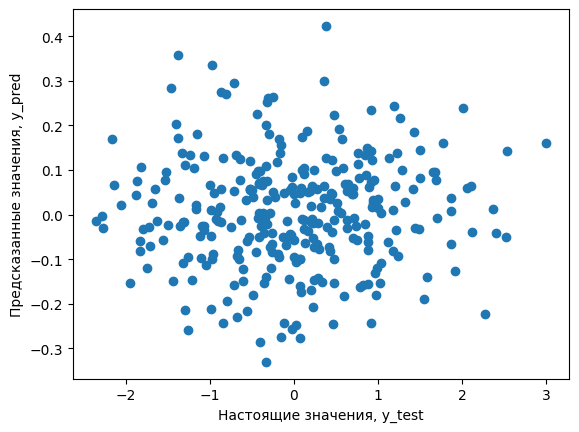

In [154]:
#import matplotlib.pyplot as plt
#plt.scatter(y_test, y_pred)
#plt.xlabel("Настоящие значения, y_test")
#plt.ylabel("Предсказанные значения, y_pred")
#plt.show()

In [155]:
#y_test[:5]

array([ 2.39767474,  0.06707122, -1.23587575,  0.91446665, -0.56781254])

In [156]:
#y_pred[:5]

array([-0.04156448, -0.10046349,  0.13368204,  0.23458163,  0.03188184])

In [157]:
#from sklearn import metrics

#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error:', 
 #     np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.806012203669489
Mean Squared Error: 1.0224063010780122
Root Mean Squared Error: 1.011141088611284


In [171]:
#y_pred_df = pd.DataFrame(y_pred)
#y_pred_df

,0
0,-0.041564
1,-0.100463
2,0.133682
3,0.234582
4,0.031882
...,...
302,-0.154261
303,0.045873
304,-0.079413
305,-0.096760


In [172]:
#y_pred_df = min_max_scaler_y_1.inverse_transform(y_pred_df)
#y_pred_df[:5]

array([[73.19899572],
       [73.01538053],
       [73.74531941],
       [74.05986965],
       [73.42796154]])

In [173]:
#y_test_df = pd.DataFrame(y_test)
#y_test_df[:3]

,0
0,2.397675
1,0.067071
2,-1.235876


In [174]:
#y_test_df = min_max_scaler_y_1.inverse_transform(y_test_df)

In [175]:
#y_test_df[:5]

array([[80.80322176],
       [73.53766298],
       [69.4757804 ],
       [76.17938272],
       [71.55843946]])

In [176]:
#residuals = y_test_df - y_pred_df
#residuals.shape

(307, 1)

In [177]:
#residuals[:3]

array([[ 7.60422604],
       [ 0.52228245],
       [-4.269539  ]])

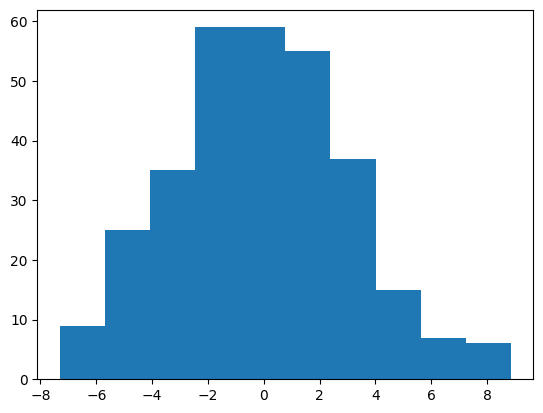

In [178]:
#plt.hist(residuals);

In [179]:
#print(residuals[np.argmax(np.abs(residuals))])

[8.85353224]


In [191]:
#print(residuals[np.argmin(np.abs(residuals))])

[0.00166293]


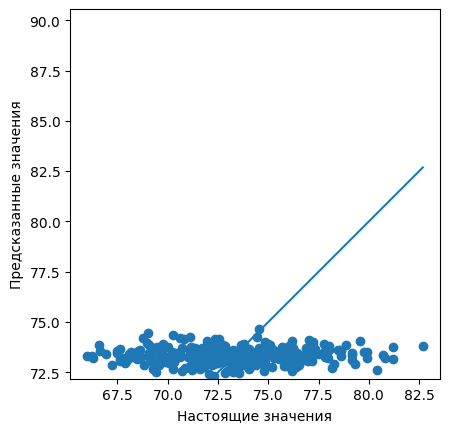

In [180]:
#plt.scatter(y_test_df, y_pred_df)
#plt.xlabel("Настоящие значения")
#plt.ylabel("Предсказанные значения")

#plt.axis('square')
#x = y = [np.min(y_test_df), np.max(y_test_df)]
#plt.plot(x, y)
#plt.show()

In [192]:
#number = np.argmin(np.abs(residuals))
number

87

In [193]:
#residuals[number]

array([0.00166293])

In [194]:
#y_test_df[number]

array([72.2994617])

In [195]:
#y_pred_df[number]

array([72.29779878])

In [199]:
#str1 = f"Мод упруг при растяж = {regressor.intercept_} "
#for coef, col in zip(regressor.coef_, X.columns):
#    str1 += " + (" +str(np.round(coef, 3)) + ") * " + str(col)
#str1

'Мод упруг при растяж = -0.588302633912119  + (0.168) * Matrix-Filler Ratio + (0.126) * Density + (0.155) * Elastic Modulus + (-0.436) * Curing Agent Quantity + (0.466) * Epoxy Groups Content + (0.42) * Flash Point Temperature + (0.321) * Resin Consumption + (-0.021) * Layup Step + (0.03) * Surface Density_boxcox + (0.007) * Layup Density + (-0.037) * Layup_0 + (0.037) * Layup_90'

In [202]:
 # Загрузка DataFrame из сохраненного CSV-файла
df = pd.read_csv('composit_stand.csv')

df

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Tensile Elastic Modulus,Tensile Strength,Resin Consumption,Layup Step,Layup Density,Layup_0,Layup_90,Surface Density_boxcox
0,-1.175779,0.736365,-0.003594,-2.848828,0.009757,-4.542215,-1.067720,1.098244,0.026410,-1.131530,-0.012469,1.0,0.0,-0.933204
1,-1.175779,0.736365,-0.003594,-2.141666,0.626001,-0.030955,-1.067720,1.098244,0.026410,-1.131530,0.230546,1.0,0.0,-0.933204
2,-1.175779,0.736365,-0.003594,-2.145202,4.471955,-0.030955,-1.067720,1.098244,0.026410,-1.131530,1.040595,1.0,0.0,-0.933204
3,-1.175779,0.736365,-0.003594,0.651622,-0.413446,0.344984,-1.067720,1.098244,0.026410,-0.741243,-0.822518,1.0,0.0,-0.933204
4,-0.174232,0.736365,0.039618,0.045585,0.009757,-0.030955,-1.067720,1.098244,0.026410,-0.741243,-0.012469,1.0,0.0,-0.933204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,-0.721995,-0.320884,0.523926,-0.833694,-0.881925,0.950375,-0.076219,-0.164054,-1.564572,0.849718,-0.820917,0.0,1.0,-0.936890
1019,0.562741,1.008971,-0.894327,1.252072,-1.099577,-0.773808,-0.130794,-0.219473,-1.686461,1.430947,-0.275671,0.0,1.0,-0.349307
1020,0.383707,-0.045622,-0.978843,-0.001319,0.712276,-0.915350,0.450935,0.403764,0.304549,-1.068634,0.848588,0.0,1.0,0.920115
1021,0.849043,1.235730,0.004703,1.089990,-1.246274,-0.246860,0.229077,-0.814204,-0.356695,-0.228717,0.089684,0.0,1.0,0.628830


In [203]:
numerical = ['Matrix-Filler Ratio', 'Density', 'Elastic Modulus',\
             'Curing Agent Quantity', 'Epoxy Groups Content','Flash Point Temperature',\
             'Surface Density_boxcox', 'Resin Consumption', 'Layup Step', 'Layup Density']

In [204]:
# Выбираем только числовые признаки
numerical_df = df[numerical]

In [205]:
# Количественно выбросы можно найти через стандартизированную оценку (z-оценку, z-score).
# Эта оценка показывает на сколько средних квадратических отклонений значение отличается от среднего
from scipy import stats
z = stats.zscore(df[numerical])
z=pd.DataFrame(z,columns=df[numerical].columns)
z.head()

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Surface Density_boxcox,Resin Consumption,Layup Step,Layup Density
0,-1.175779,0.736365,-0.003594,-2.848828,0.009757,-4.542215,-0.933204,0.02641,-1.131530,-0.012469
1,-1.175779,0.736365,-0.003594,-2.141666,0.626001,-0.030955,-0.933204,0.02641,-1.131530,0.230546
2,-1.175779,0.736365,-0.003594,-2.145202,4.471955,-0.030955,-0.933204,0.02641,-1.131530,1.040595
3,-1.175779,0.736365,-0.003594,0.651622,-0.413446,0.344984,-0.933204,0.02641,-0.741243,-0.822518
4,-0.174232,0.736365,0.039618,0.045585,0.009757,-0.030955,-0.933204,0.02641,-0.741243,-0.012469


In [206]:
# Общее количество выбросов в наборе данных
# найдем те значения, которые отклоняются больше чем на три СКО
# технически, метод .any() выводит True для тех строк (axis = 1), где хотя бы одно значение True (т.е. > 3)
numerical_df[(np.abs(z) > 3).any(axis = 1)]

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Surface Density_boxcox,Resin Consumption,Layup Step,Layup Density
0,-1.175779,0.736365,-0.003594,-2.848828,0.009757,-4.542215,-0.933204,0.026410,-1.131530,-0.012469
2,-1.175779,0.736365,-0.003594,-2.145202,4.471955,-0.030955,-0.933204,0.026410,-1.131530,1.040595
19,0.659497,0.057877,1.342372,0.045585,0.009757,-0.030955,1.650689,1.366293,-2.692680,-4.629749
41,-0.509611,-0.537848,0.959286,-1.388749,0.947556,-0.339818,-1.337914,0.144028,0.196049,-3.070361
100,0.696216,3.148712,-0.132621,-0.579277,0.548202,0.144706,-0.222504,3.077386,-0.931381,-0.840706
140,-2.344350,1.063720,0.414674,0.223414,0.549069,1.653823,0.635437,0.481856,-0.543429,3.325144
211,-0.256561,-0.216509,-2.160439,0.758826,-0.987721,1.560092,0.269758,3.285517,2.103042,1.287237
257,0.106163,-0.226939,0.534790,-3.282308,-0.115928,-0.155499,0.209591,0.456633,-0.459540,1.135602
279,1.647791,1.169496,-1.245331,-1.043041,0.402818,-1.002072,1.455276,-0.675920,-1.604373,-3.678741
298,-0.597362,2.080582,-0.454874,-1.407599,-3.321825,0.394929,0.732701,-2.112258,-0.877741,0.551057


In [207]:
# Выводим количество выбросов по каждому признаку
outliers_count = (np.abs(z) > 3).sum()
print(outliers_count)

Matrix-Filler Ratio        0
Density                    3
Elastic Modulus            2
Curing Agent Quantity      2
Epoxy Groups Content       2
Flash Point Temperature    3
Surface Density_boxcox     0
Resin Consumption          3
Layup Step                 0
Layup Density              7
dtype: int64


In [208]:
# ДАТАСЕТ БЕЗ ВЫБРОСОВ
outlier_mask = (np.abs(z) > 3).any(axis=1)

df_without_outliers = df[~outlier_mask]
df_without_outliers

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Tensile Elastic Modulus,Tensile Strength,Resin Consumption,Layup Step,Layup Density,Layup_0,Layup_90,Surface Density_boxcox
1,-1.175779,0.736365,-0.003594,-2.141666,0.626001,-0.030955,-1.067720,1.098244,0.026410,-1.131530,0.230546,1.0,0.0,-0.933204
3,-1.175779,0.736365,-0.003594,0.651622,-0.413446,0.344984,-1.067720,1.098244,0.026410,-0.741243,-0.822518,1.0,0.0,-0.933204
4,-0.174232,0.736365,0.039618,0.045585,0.009757,-0.030955,-1.067720,1.098244,0.026410,-0.741243,-0.012469,1.0,0.0,-0.933204
5,-0.177971,0.329272,0.024470,0.045585,0.009757,-0.030955,-1.067720,1.098244,0.026410,-0.741243,0.230546,1.0,0.0,-0.933204
6,-0.395218,-0.892008,0.203220,0.045585,0.009757,-0.030955,-1.067720,1.098244,0.026410,-0.741243,1.040595,1.0,0.0,-0.933204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,-0.721995,-0.320884,0.523926,-0.833694,-0.881925,0.950375,-0.076219,-0.164054,-1.564572,0.849718,-0.820917,0.0,1.0,-0.936890
1019,0.562741,1.008971,-0.894327,1.252072,-1.099577,-0.773808,-0.130794,-0.219473,-1.686461,1.430947,-0.275671,0.0,1.0,-0.349307
1020,0.383707,-0.045622,-0.978843,-0.001319,0.712276,-0.915350,0.450935,0.403764,0.304549,-1.068634,0.848588,0.0,1.0,0.920115
1021,0.849043,1.235730,0.004703,1.089990,-1.246274,-0.246860,0.229077,-0.814204,-0.356695,-0.228717,0.089684,0.0,1.0,0.628830


#### 3.1 Линейная регрессия

In [209]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [211]:
# Выделение переменных X и Y
X = df[['Matrix-Filler Ratio','Density', 'Elastic Modulus', 'Curing Agent Quantity', \
        'Epoxy Groups Content', 'Flash Point Temperature', 'Resin Consumption', 'Layup Step', 'Surface Density_boxcox', \
         'Layup Density', 'Layup_0',  'Layup_90', ]]
y_1 = df['Tensile Elastic Modulus']
y_2 = df['Tensile Strength']


# Разделение на обучающую и тестовую выборки
X_train, X_test, y_1_train, y_1_test = train_test_split(X, y_1, test_size=0.3, random_state=42)

In [214]:
X.head(3)

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Resin Consumption,Layup Step,Surface Density_boxcox,Layup Density,Layup_0,Layup_90
0,-1.175779,0.736365,-0.003594,-2.848828,0.009757,-4.542215,0.02641,-1.13153,-0.933204,-0.012469,1.0,0.0
1,-1.175779,0.736365,-0.003594,-2.141666,0.626001,-0.030955,0.02641,-1.13153,-0.933204,0.230546,1.0,0.0
2,-1.175779,0.736365,-0.003594,-2.145202,4.471955,-0.030955,0.02641,-1.13153,-0.933204,1.040595,1.0,0.0


In [215]:
y_1

0      -1.067720
1      -1.067720
2      -1.067720
3      -1.067720
4      -1.067720
          ...   
1018   -0.076219
1019   -0.130794
1020    0.450935
1021    0.229077
1022    0.314722
Name: Tensile Elastic Modulus, Length: 1023, dtype: float64

In [216]:
model = LinearRegression()
model.fit(X_train, y_1_train)

# Прогнозирование
y_pred = model.predict(X_test)



#  Оценка модели
mse = mean_squared_error(y_1_test, y_pred)
r2 = r2_score(y_1_test, y_pred)
mae = mean_absolute_error(y_1_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 1.041714281612283
R-squared (R2): -0.019077569232072378
Mean Absolute Error (MAE): 0.8213055722402094


In [217]:
y_pred[:5]

array([ 0.12295993, -0.07211621,  0.09780337,  0.17511978, -0.08470962])

In [218]:
y_1_test[:5]

525    1.235697
357    1.232619
444    0.147957
31    -0.763757
618   -0.203163
Name: Tensile Elastic Modulus, dtype: float64

In [219]:
print(model.coef_)

[-0.01830092 -0.02031164  0.01664142 -0.08759457  0.0500885   0.0604764
  0.03834428 -0.05500671  0.01333573  0.00410762 -0.02256552  0.02256552]


In [220]:

prediction_df = pd.DataFrame({'Actual': y_1_test, 'Predicted': y_pred})
prediction_df.head(3)

,Actual,Predicted
525,1.235697,0.122960
357,1.232619,-0.072116
444,0.147957,0.097803


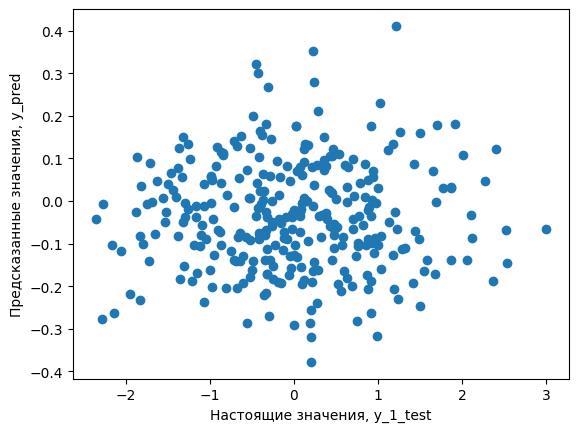

In [221]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения, y_1_test")
plt.ylabel("Предсказанные значения, y_pred")
plt.show()

In [226]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.tail()

,0
302,-0.080919
303,-0.126078
304,-0.089493
305,-0.080350
306,-0.163104


In [33]:
# Определение параметров
parameters = {
    'fit_intercept': [True, False],
}


model = LinearRegression()


grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=10)


grid_search.fit(X_train, y_1_train)

# Вывод наилучших параметров и оценки
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)


best_model = grid_search.best_estimator_

# Прогнозирование с использованием лучшей модели
y_pred_best = best_model.predict(X_test)

# Оценка лучшей модели
mse_best = mean_squared_error(y_1_test, y_pred_best)
r2_best = r2_score(y_1_test, y_pred_best)
mae_best = mean_absolute_error(y_1_test, y_pred_best)

print("Best model evaluation:")
print("Mean Squared Error (MSE):", mse_best)
print("R-squared (R2):", r2_best)
print("Mean Absolute Error (MAE):", mae_best)

Best parameters found:  {'fit_intercept': False}
Best score found:  -0.03453446151290448
Best model evaluation:
Mean Squared Error (MSE): 1.041714281612283
R-squared (R2): -0.019077569232072378
Mean Absolute Error (MAE): 0.8213055722402094


In [34]:
from sklearn.linear_model import Lasso, Ridge


lasso_model = Lasso(alpha=0.1)


lasso_model.fit(X_train, y_1_train)


ridge_model = Ridge(alpha=0.1)


ridge_model.fit(X_train, y_1_train)


lasso_y_pred = lasso_model.predict(X_test)


ridge_y_pred = ridge_model.predict(X_test)

# Оценка моделей Lasso и Ridge
lasso_mse = mean_squared_error(y_1_test, lasso_y_pred)
ridge_mse = mean_squared_error(y_1_test, ridge_y_pred)

print("Lasso Mean Squared Error (MSE):", lasso_mse)
print("Ridge Mean Squared Error (MSE):", ridge_mse)


Lasso Mean Squared Error (MSE): 1.0390033194736867
Ridge Mean Squared Error (MSE): 1.0417114733043251


In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


poly_features = PolynomialFeatures(degree=2)


X_poly = poly_features.fit_transform(X)


X_poly_train, X_poly_test, y_1_train, y_1_test = train_test_split(X_poly, y_1, test_size=0.1, random_state=42)


lasso_poly_model = make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=0.1))


lasso_poly_model.fit(X_poly_train, y_1_train)


ridge_poly_model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=0.1))


ridge_poly_model.fit(X_poly_train, y_1_train)


lasso_poly_y_pred = lasso_poly_model.predict(X_poly_test)
ridge_poly_y_pred = ridge_poly_model.predict(X_poly_test)


lasso_poly_mse = mean_squared_error(y_1_test, lasso_poly_y_pred)
ridge_poly_mse = mean_squared_error(y_1_test, ridge_poly_y_pred)

print("Lasso with Polynomial Features Mean Squared Error (MSE):", lasso_poly_mse)
print("Ridge with Polynomial Features Mean Squared Error (MSE):", ridge_poly_mse)

Lasso with Polynomial Features Mean Squared Error (MSE): 1.01491014035122
Ridge with Polynomial Features Mean Squared Error (MSE): 45.3458116488906


#### 3.2 Метод опорных векторов

In [39]:
X_train, X_test, y_1_train, y_1_test = train_test_split(X, y_1, test_size=0.3, random_state=42)
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_1_train)

#svm_model.fit(X_train, y_2_train)

# Прогнозирование для модели SVM
svm_y_pred = svm_model.predict(X_test)

# Оценка модели SVM
svm_mse = mean_squared_error(y_1_test, svm_y_pred)
svm_mae = mean_absolute_error(y_1_test, svm_y_pred)
svmr2 = r2_score(y_1_test, svm_y_pred)

print("SVM Mean Squared Error (MSE):", svm_mse)
print("SVM Mean Absolute Error (MAE):", svm_mae)
print("R2 score:",svmr2)

SVM Mean Squared Error (MSE): 1.1988987524056438
SVM Mean Absolute Error (MAE): 0.8799065867056404
R2 score: -0.17284638208659975


In [40]:
# Определение параметров
parameters = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}


svm_model = SVR(kernel='rbf')


grid_search = GridSearchCV(estimator=svm_model, param_grid=parameters, cv=10)


grid_search.fit(X_train, y_1_train)


print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# Получение лучшей модели
best_model = grid_search.best_estimator_

# Прогнозирование с использованием лучшей модели
svm_y_pred_best = best_model.predict(X_test)

# Оценка лучшей модели
svm_mse_best = mean_squared_error(y_1_test, svm_y_pred_best)
svm_mae_best = mean_absolute_error(y_1_test, svm_y_pred_best)
svm_r2_best=r2_score(y_1_test, svm_y_pred_best)

print("SVM Best model evaluation:")
print("SVM Mean Squared Error (MSE):", svm_mse_best)
print("SVM Mean Absolute Error (MAE):", svm_mae_best)
svm_r2_best

Best parameters found:  {'C': 0.1, 'gamma': 'auto'}
Best score found:  -0.03111138583984637
SVM Best model evaluation:
SVM Mean Squared Error (MSE): 1.0634699100021041
SVM Mean Absolute Error (MAE): 0.8273560969115775


-0.040360442365289906

#### 3.3 Случайный лес

In [18]:

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_1_train)


y_pred_rf = rf_model.predict(X_test)

# Оценка модели
mse_rf = mean_squared_error(y_1_test, y_pred_rf)
r2_rf = r2_score(y_1_test, y_pred_rf)
mae_rf = mean_absolute_error(y_1_test, y_pred_rf)

print("Random Forest Mean Squared Error (MSE):", mse_rf)
print("Random Forest R-squared (R2):", r2_rf)
print("Random Forest Mean Absolute Error (MAE):", mae_rf)

Random Forest Mean Squared Error (MSE): 1.123582158221028
Random Forest R-squared (R2): -0.08863747177608605
Random Forest Mean Absolute Error (MAE): 0.8565203047085475


In [19]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV

#X_train, X_test, y_2_train, y_2_test = train_test_split(X, y_2, test_size=0.3, random_state=42)
# Определение параметров
parameters = {
    'n_estimators': [20, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


rf_model = RandomForestRegressor(random_state=42)


grid_search = GridSearchCV(estimator=rf_model, param_grid=parameters, cv=10)


grid_search.fit(X_train, y_1_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

# Оценка лучшей модели
mse_best = mean_squared_error(y_1_test, y_pred_best)
r2_best = r2_score(y_1_test, y_pred_best)
mae_best = mean_absolute_error(y_1_test, y_pred_best)

print("Random Forest Best model evaluation:")
print("Mean Squared Error (MSE):", mse_best)
print("R-squared (R2):", r2_best)
print("Mean Absolute Error (MAE):", mae_best)

C:\Users\AsusNB\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AsusNB\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AsusNB\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\AsusNB\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(

Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score found:  -0.016377425763608656
Random Forest Best model evaluation:
Mean Squared Error (MSE): 1.08859090223674
R-squared (R2): -0.05473448375666301
Mean Absolute Error (MAE): 0.8466771102191865


#### 3.4 Градиентный бустинг

In [20]:

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_1_train)


y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_1_test, y_pred_gb)
r2_gb = r2_score(y_1_test, y_pred_gb)
mae_gb = mean_absolute_error(y_1_test, y_pred_gb)

print("Gradient Boosting Mean Squared Error (MSE):", mse_gb)
print("Gradient Boosting R-squared (R2):", r2_gb)
print("Gradient Boosting Mean Absolute Error (MAE):", mae_gb)

Gradient Boosting Mean Squared Error (MSE): 1.1597729647175343
Gradient Boosting R-squared (R2): -0.12370270291883956
Gradient Boosting Mean Absolute Error (MAE): 0.8695231280626442


In [21]:
param_grid_gb = {
    'n_estimators': [30, 50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}


gb_model = GradientBoostingRegressor(random_state=42)


grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=10, scoring='neg_mean_squared_error')


grid_search_gb.fit(X_train, y_1_train)

# Вывод результатов
print("Наилучшие параметры для GradientBoostingRegressor:", grid_search_gb.best_params_)
print("Наилучшая среднеквадратическая ошибка (MSE) для GradientBoostingRegressor:", -grid_search_gb.best_score_)

# Получение наилучшей модели после обучения
best_gb_model = grid_search_gb.best_estimator_

# Предсказание на тестовом наборе данных
y_gb_pred = best_gb_model.predict(X_test)

# Вычисление МАЕ и R2 для GradientBoostingRegressor
gb_mae = mean_absolute_error(y_1_test, y_gb_pred)
gb_r2 = r2_score(y_1_test, y_gb_pred)


# Вывод результатов для GradientBoostingRegressor
print("Средняя абсолютная ошибка (MAE) для GradientBoostingRegressor:", gb_mae)
print("R-squared (R2) для GradientBoostingRegressor:", gb_r2)


Наилучшие параметры для GradientBoostingRegressor: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 30}
Наилучшая среднеквадратическая ошибка (MSE) для GradientBoostingRegressor: 0.9935093244428266
Средняя абсолютная ошибка (MAE) для GradientBoostingRegressor: 0.8305794931647824
R-squared (R2) для GradientBoostingRegressor: -0.019207855510200655


####**4. Разработка нейронной сети**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.initializers import he_normal
from keras.initializers import glorot_uniform, lecun_uniform, random_uniform, random_normal, TruncatedNormal
import matplotlib.pyplot as plt  # Для построения графиков

In [2]:
#pip install keras
#!pip install tensorflow

In [3]:
# Загрузка данных
df = pd.read_csv('composit_stand.csv')

# Подготовка данных
X = df.drop(columns=['Matrix-Filler Ratio'])  # Все признаки, кроме Matrix-Filler Ratio
y = df['Matrix-Filler Ratio']  # Целевая переменная - оптимальное соотношение Matrix-Filler Ratio

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [61]:
# Создание нейронной сети с инициализацией весов
model = Sequential()
model.add(Dense(256, activation='relu', kernel_initializer=glorot_uniform(), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer=glorot_uniform()))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_initializer=glorot_uniform()))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_initializer=glorot_uniform()))
model.add(Dense(1))#, activation='linear'))



In [5]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [28]:
# Компиляция модели с настройкой learning_rate
optimizer = Adam(learning_rate=0.001)  # Вы можете изменить этот параметр
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

In [29]:
# Обучение модели
history=model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.25)
history

Epoch 1/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1578 - mae: 0.3114 - val_loss: 1.0139 - val_mae: 0.8094
Epoch 2/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1527 - mae: 0.2843 - val_loss: 1.0183 - val_mae: 0.8107
Epoch 3/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1655 - mae: 0.2984 - val_loss: 1.0194 - val_mae: 0.8107
Epoch 4/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1399 - mae: 0.2786 - val_loss: 1.0287 - val_mae: 0.8143
Epoch 5/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1522 - mae: 0.2904 - val_loss: 1.0191 - val_mae: 0.8076
Epoch 6/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1727 - mae: 0.3107 - val_loss: 1.0118 - val_mae: 0.8032
Epoch 7/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1601 - mae: 0.3087 - val_loss: 1.0216 - val_mae: 0.8125
Epoch 8/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1764 - mae: 0.2989 - val_loss: 1.0252 - val_mae: 0.8141
Epoch 9/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1

In [30]:
# Оценка модели
mae, mse = model.evaluate(X_test, y_test)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2000 - mae: 0.9027 
Mean Squared Error (MSE): 0.9587464928627014
Mean Absolute Error (MAE): 1.3118401765823364


In [34]:
#history=model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.25)

In [35]:
#history=model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.25)


In [36]:
#mse, mae = model.evaluate(X_test, y_test)
#print("Mean Squared Error (MSE):", mse)
#print("Mean Absolute Error (MAE):", mae)

In [49]:
#history.history

In [38]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='Ошибка обучения')
  plt.plot(history.history['val_loss'], label='Ошибка валидации')
  plt.ylim([0, 2])
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Ошибка прогноза')
  plt.legend()
  plt.grid(True)

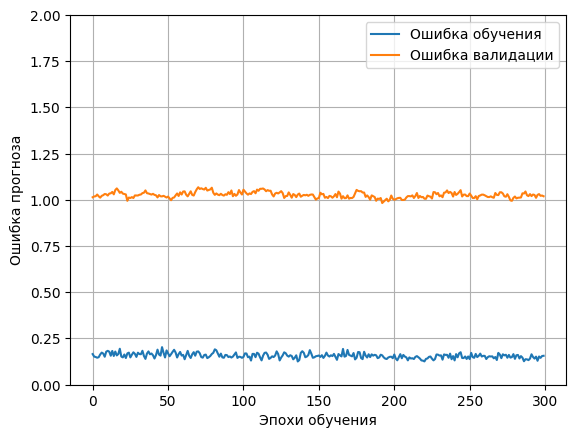

In [39]:
plot_loss(history)

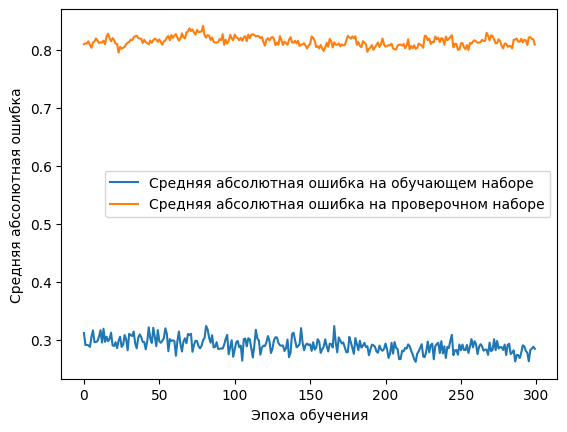

In [41]:

    
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
#plt.show()

In [42]:
#plt.plot(history.history['loss'], label="loss")
#plt.plot(history.history['val_loss'], label="val_loss")
#plt.legend()

In [43]:
#model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

In [44]:
#mse, mae = model.evaluate(X_test, y_test)
#print("Mean Squared Error (MSE):", mse)
#print("Mean Absolute Error (MAE):", mae)

In [45]:
# Выбираем одну строку из тестовой выборки
index_to_predict = 0  # Индекс строки
sample_to_predict = X_test.iloc[index_to_predict:index_to_predict+1]  # Выбор одной строки из тестовой выборки

prediction = model.predict(sample_to_predict)

print("Предсказанное значение Matrix-Filler Ratio:", prediction[0][0])
print("Фактическое значение Matrix-Filler Ratio для этой строки:", y_test.iloc[index_to_predict])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Предсказанное значение Matrix-Filler Ratio: 0.68535155
Фактическое значение Matrix-Filler Ratio для этой строки: 0.9418364409963218


####**5. Разработка приложения**

In [ ]:
# Создаем Python-скрипт  и выкладываем в папку. Затем заходим в командную строку, переходим по пути в папку где лежит Python-скрипт и туда же кладем
#  composit_stand.csv. Далее запускаем командную строку и вводим значения наших переменных, после чего производится рассчет целевого значения
import argparse
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd


def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, r2, mae

def get_user_input(X_columns):
    user_input = {}
    for column in X_columns:
        value = input(f"Введите значение для признака '{column}': ")
        user_input[column] = float(value)
    return user_input

def main():
    # Обработка аргументов командной строки
    parser = argparse.ArgumentParser(description='Linear Regression Prediction')
    parser.add_argument('data_file', type=str, help='Path to data file')
    args = parser.parse_args()

    # Загрузка данных из файла
    data = pd.read_csv(args.data_file)
    X = data.drop(columns=['Tensile Elastic Modulus', 'Tensile Strength'])
    y = data['Tensile Elastic Modulus']

     # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Обучение модели
    model = train_model(X_train, y_train)

    # Оценка модели
    mse, r2, mae = evaluate_model(model, X_test, y_test)

    # Вывод результатов
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):", r2)
    print("Mean Absolute Error (MAE):", mae)

    # Получение пользовательского ввода и предсказание
    user_input = get_user_input(X.columns)
    user_input_df = pd.DataFrame([user_input])
    prediction = model.predict(user_input_df)
    print("Предсказанное значение:", prediction[0])

if __name__ == "__main__":
    main()
    